<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/20190703_%E6%95%B0%E5%80%A4%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

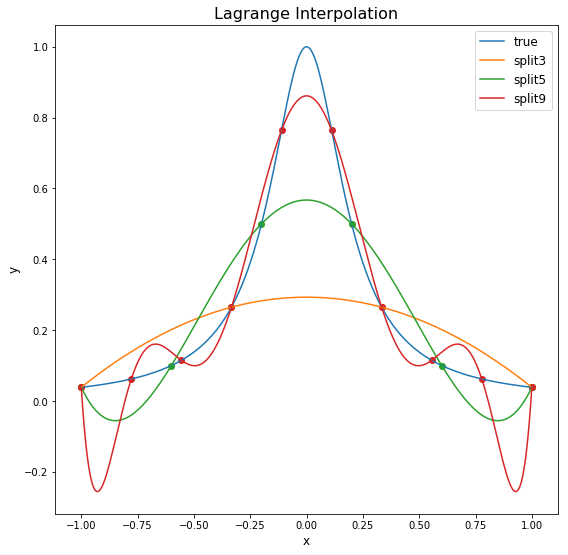

In [3]:
import numpy as np
import matplotlib.pyplot as plt

list_n = [3, 5, 9]
x_lower = -1
x_upper = 1
n = list_n[0]

def f(x):
  return 1 / (1 + 25 * x**2)

def lagrange(x_gap, y_gap):
  def f_ans(x):
    ans = 0
    for i, y in zip(x_gap, y_gap):
      ans_partial = 1
      for j in x_gap:
        if j == i:
          continue
        ans_partial *= (x-j)/(i-j)
      ans += ans_partial * y
    return ans
  return f_ans

x = np.linspace(x_lower, x_upper, 1000)
y = f(x)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(x, y, label="true")
cmap = plt.get_cmap("tab10") 
for i, n in enumerate(list_n):
  x_gap = np.linspace(x_lower, x_upper, n+1)
  y_gap = f(x_gap)#np.vectorize(f)(x_gap)
  f_lag = lagrange(x_gap, y_gap)
  y_ans = np.vectorize(f_lag)(x)
  ax.plot(x, y_ans, color=cmap(i+1), label="split"+str(n))
  ax.scatter(x_gap, y_gap, color=cmap(i+1))
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title("Lagrange Interpolation", fontsize=16)
ax.legend(fontsize=12)
fig.show()
plt.savefig("lagrange_interpolatioin.jpg")

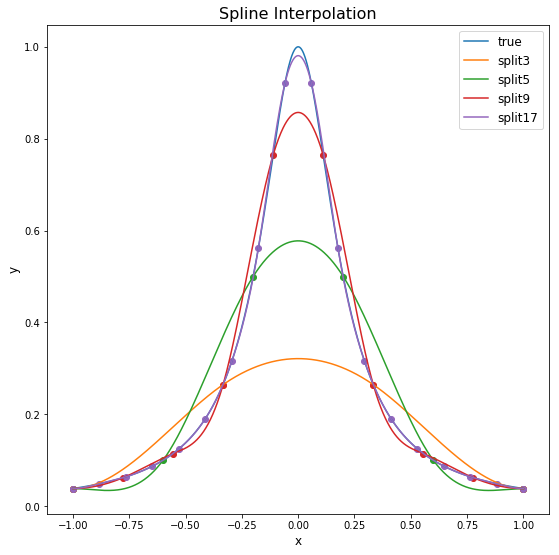

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 1 / (1 + 25 * x**2)

class Spline(object):
  def __init__(self, xs, f):
    self.xs = xs
    self.ys = f(xs)
    self.d = list()
    self.g_2prime = list()
    
    self.calc_g_2prime()

  #二階微分を求める
  def calc_g_2prime(self):
    x_split = len(xs)
    con_matrix = np.zeros((x_split, x_split))
    for i in range(x_split):
      if i == 0:
        delta_i_pre = 0
        delta_i_now = xs[i+1] - xs[i]
        b = (delta_i_now + delta_i_pre)/3
        c = delta_i_now/6
        d = (self.ys[i+1] - self.ys[i])/delta_i_now
        con_matrix[i, 0] = b
        con_matrix[i, 1] = c
      elif i == x_split - 1:
        delta_i_pre = xs[i] - xs[i-1]
        delta_i_now = 0
        a = delta_i_pre/6
        b = (delta_i_now + delta_i_pre)/3
        d = -(self.ys[i] - self.ys[i-1])/delta_i_pre
        con_matrix[i, -2] = a
        con_matrix[i, -1] = b
      else:
        delta_i_pre = xs[i] - xs[i-1]
        delta_i_now = xs[i+1] - xs[i]
        a = delta_i_pre/6
        b = (delta_i_now + delta_i_pre)/3
        c = delta_i_now/6
        d = (self.ys[i+1] - self.ys[i])/delta_i_now - (self.ys[i] - self.ys[i-1])/delta_i_pre
        con_matrix[i, i-1] = a
        con_matrix[i, i] = b
        con_matrix[i, i+1] = c
      self.d.append(d)
    self.g_2prime = np.dot(np.linalg.inv(con_matrix), self.d) 
  
  #xがどの区間に所属するか確かめ、該当関数gに代入
  def calc_ans(self, x_ans):
    y_ans = list()
    for x in x_ans:
      list_bool = (self.xs[:-1] <= x)
      index = sum(list_bool) - 1
      i = index
      def g(x):
        delta_x = xs[i+1] - xs[i]
        return (self.g_2prime[i] / 6 * (-(x - self.xs[i+1])**3 / delta_x - delta_x * (self.xs[i+1]-x)) 
                + self.g_2prime[i+1] / 6 * ((x - self.xs[i])**3 / delta_x - delta_x * (x - self.xs[i])) 
                + self.ys[i] * (xs[i+1] - x) / delta_x + self.ys[i+1] * (x - self.xs[i]) / delta_x)
      y_ans.append(g(x))
    return y_ans
  
  
list_n = [3, 5, 9, 17]
x_lower = -1
x_upper = 1
x_ans = np.linspace(x_lower, x_upper, 1000)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
cmap = plt.get_cmap("tab10")
ax.plot(x_ans, f(x_ans), label="true")
for i, n in enumerate(list_n):
  xs = np.linspace(x_lower, x_upper, n+1)   
  spline = Spline(xs, f)
  y_ans = spline.calc_ans(x_ans)
  ax.plot(x_ans, y_ans, color=cmap(i+1), label="split"+str(n))
  ax.scatter(xs, f(xs), color=cmap(i+1))
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title("Spline Interpolation", fontsize=16)
ax.legend(fontsize=12)
fig.show()
plt.savefig("spline_interpolation.jpg")

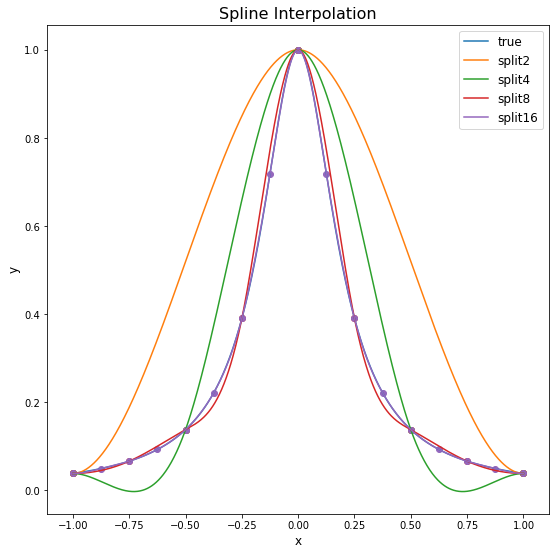

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 1 / (1 + 25 * x**2)

class Spline(object):
  def __init__(self, xs, f):
    self.xs = xs
    self.ys = f(xs)
    self.d = list()
    self.g_2prime = list()
    
    self.calc_g_2prime()

  #二階微分を求める
  def calc_g_2prime(self):
    x_split = len(xs)
    con_matrix = np.zeros((x_split, x_split))
    for i in range(x_split):
      if i == 0:
        delta_i_pre = 0
        delta_i_now = xs[i+1] - xs[i]
        b = (delta_i_now + delta_i_pre)/3
        c = delta_i_now/6
        d = (self.ys[i+1] - self.ys[i])/delta_i_now
        con_matrix[i, 0] = b
        con_matrix[i, 1] = c
      elif i == x_split - 1:
        delta_i_pre = xs[i] - xs[i-1]
        delta_i_now = 0
        a = delta_i_pre/6
        b = (delta_i_now + delta_i_pre)/3
        d = -(self.ys[i] - self.ys[i-1])/delta_i_pre
        con_matrix[i, -2] = a
        con_matrix[i, -1] = b
      else:
        delta_i_pre = xs[i] - xs[i-1]
        delta_i_now = xs[i+1] - xs[i]
        a = delta_i_pre/6
        b = (delta_i_now + delta_i_pre)/3
        c = delta_i_now/6
        d = (self.ys[i+1] - self.ys[i])/delta_i_now - (self.ys[i] - self.ys[i-1])/delta_i_pre
        con_matrix[i, i-1] = a
        con_matrix[i, i] = b
        con_matrix[i, i+1] = c
      self.d.append(d)
    self.g_2prime = np.dot(np.linalg.inv(con_matrix), self.d) 
  
  #xがどの区間に所属するか確かめ、該当関数gに代入
  def calc_ans(self, x_ans):
    y_ans = list()
    for x in x_ans:
      list_bool = (self.xs[:-1] <= x)
      index = sum(list_bool) - 1
      i = index
      def g(x):
        delta_x = xs[i+1] - xs[i]
        return (self.g_2prime[i] / 6 * (-(x - self.xs[i+1])**3 / delta_x - delta_x * (self.xs[i+1]-x)) 
                + self.g_2prime[i+1] / 6 * ((x - self.xs[i])**3 / delta_x - delta_x * (x - self.xs[i])) 
                + self.ys[i] * (xs[i+1] - x) / delta_x + self.ys[i+1] * (x - self.xs[i]) / delta_x)
      y_ans.append(g(x))
    return y_ans
  
  
list_n = [2, 4, 8, 16]
x_lower = -1
x_upper = 1
x_ans = np.linspace(x_lower, x_upper, 1000)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
cmap = plt.get_cmap("tab10")
ax.plot(x_ans, f(x_ans), label="true")
for i, n in enumerate(list_n):
  xs = np.linspace(x_lower, x_upper, n+1)   
  spline = Spline(xs, f)
  y_ans = spline.calc_ans(x_ans)
  ax.plot(x_ans, y_ans, color=cmap(i+1), label="split"+str(n))
  ax.scatter(xs, f(xs), color=cmap(i+1))
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_title("Spline Interpolation", fontsize=16)
ax.legend(fontsize=12)
fig.show()
plt.savefig("spline_interpolation2.jpg")

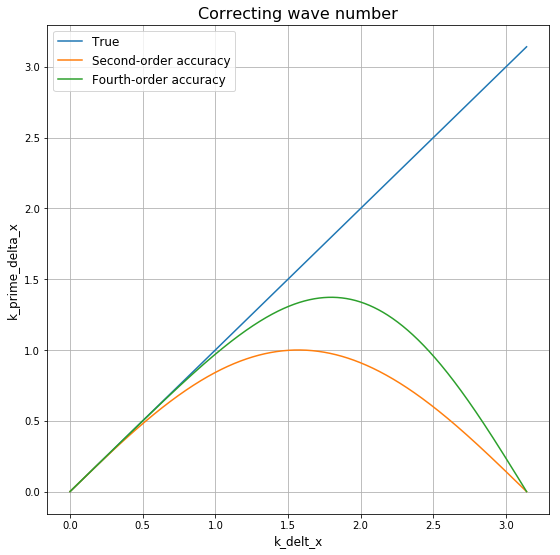

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def f2(x):
  return np.sin(x)
def f4(x):
  return (8*np.sin(x) - np.sin(2*x))/6 
k_x = np.linspace(0, np.pi, 1000)
k_x_prime_2 = f2(k_x)
k_x_prime_4 = f4(k_x)

fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(k_x, k_x, label = "True")
ax.plot(k_x, k_x_prime_2, label = "Second-order accuracy")
ax.plot(k_x, k_x_prime_4, label = "Fourth-order accuracy") 
ax.grid()
ax.set_xlabel("k_delt_x", fontsize=12)
ax.set_ylabel("k_prime_delta_x", fontsize=12)
ax.set_title("Correcting wave number", fontsize=16)
ax.legend(fontsize=12)
fig.show()
plt.savefig("correcting_wave_number.jpg")